In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
zom_df = pd.read_csv('zomato.csv')
zom_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [126]:
zom_df.shape

(51717, 17)

In [127]:
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [128]:
zom_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [129]:
zom_df.drop(columns=["url","address","phone","dish_liked","menu_item","listed_in(city)"],inplace=True)

In [130]:
zom_df["location"].fillna(zom_df["location"].mode()[0],inplace=True)
zom_df["approx_cost(for two people)"] = zom_df["approx_cost(for two people)"].astype(str).str.replace(",","",regex=True).replace(["-", "nan"], np.nan).astype(float)
zom_df["approx_cost(for two people)"] = zom_df["approx_cost(for two people)"].fillna(zom_df["approx_cost(for two people)"].median())

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\1199885244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zom_df["location"].fillna(zom_df["location"].mode()[0],inplace=True)


In [131]:
zom_df["cuisines"].fillna(zom_df["cuisines"].mode()[0],inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\1047572542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zom_df["cuisines"].fillna(zom_df["cuisines"].mode()[0],inplace=True)


In [132]:
zom_df["rest_type"].fillna("Unknown",inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\3701794456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zom_df["rest_type"].fillna("Unknown",inplace=True)


In [ ]:
def clean_rate(value):
    if value in ["NEW","-",np.nan]:
        return np.nan
    else:
        try:
            return float(str(value).split("/")[0])
        except:
            return np.nan
        
        
zom_df["rate"] = zom_df["rate"].apply(clean_rate)

In [134]:
zom_df["rate"] = zom_df["rate"].fillna(zom_df["rate"].median())

In [135]:
zom_df = zom_df.rename(columns={"approx_cost(for two people)" : "cost_of_two"})

EDA


In [136]:
avg_cost_location = zom_df.groupby("location")["cost_of_two"].mean().sort_values(ascending=False)

<Axes: xlabel='cost_of_two', ylabel='location'>

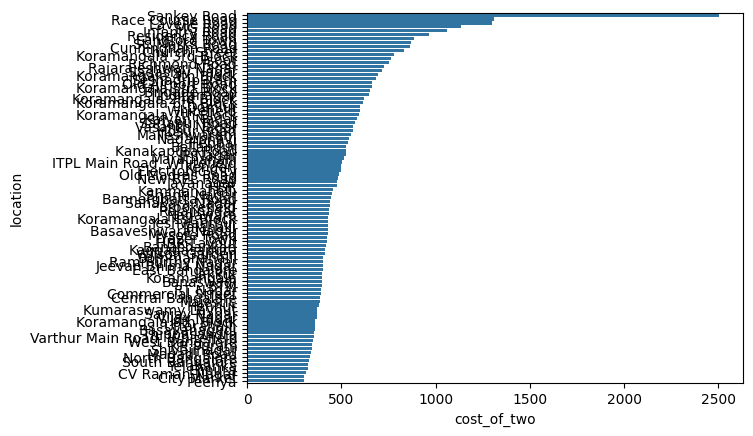

In [137]:
avg_cost_location = avg_cost_location.reset_index()
sns.barplot(x="cost_of_two", y="location", data=avg_cost_location)

In [138]:
zom_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\68048149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


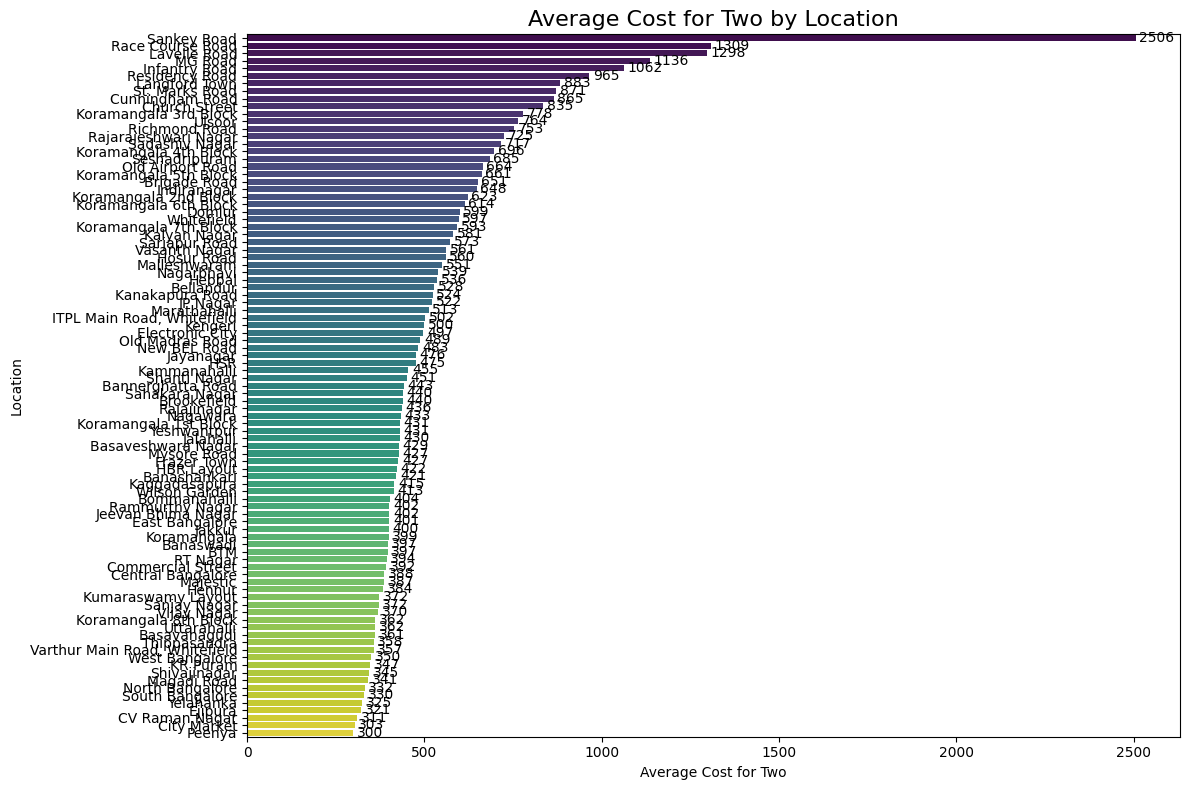

In [139]:
plt.figure(figsize=(12,8))
sns.barplot(
    x='cost_of_two', 
    y='location',  # horizontal bars
    data=avg_cost_location,
    palette='viridis'  # nice color gradient
)

# Add value labels on bars
for index, value in enumerate(avg_cost_location['cost_of_two']):
    plt.text(value + 10, index, f'{value:.0f}', va='center')

plt.title("Average Cost for Two by Location", fontsize=16)
plt.xlabel("Average Cost for Two")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

In [140]:
zom_df["rest_type"] = zom_df["rest_type"].str.split(",")

zom_df_exp = zom_df.explode("rest_type")

zom_df_exp["rest_type"] = zom_df_exp["rest_type"].str.strip()

In [143]:
rest_type_group = zom_df_exp.groupby("rest_type")["cost_of_two"].mean().reset_index()

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\1700705495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


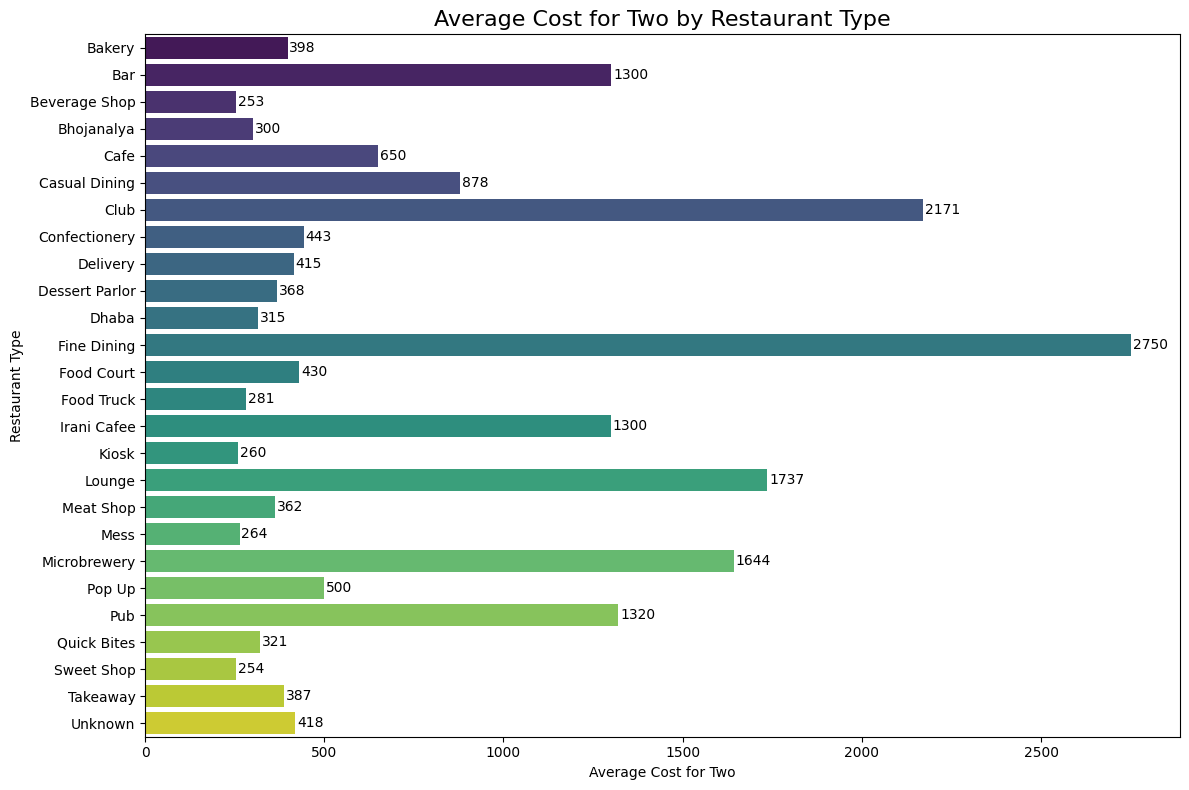

In [144]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x="cost_of_two",
    y="rest_type",
    data=rest_type_group,
    palette="viridis"
)

# Add value labels
for index, value in enumerate(rest_type_group["cost_of_two"]):
    plt.text(value + 5, index, f"{value:.0f}", va="center")

plt.title("Average Cost for Two by Restaurant Type", fontsize=16)
plt.xlabel("Average Cost for Two")
plt.ylabel("Restaurant Type")
plt.tight_layout()
plt.show()

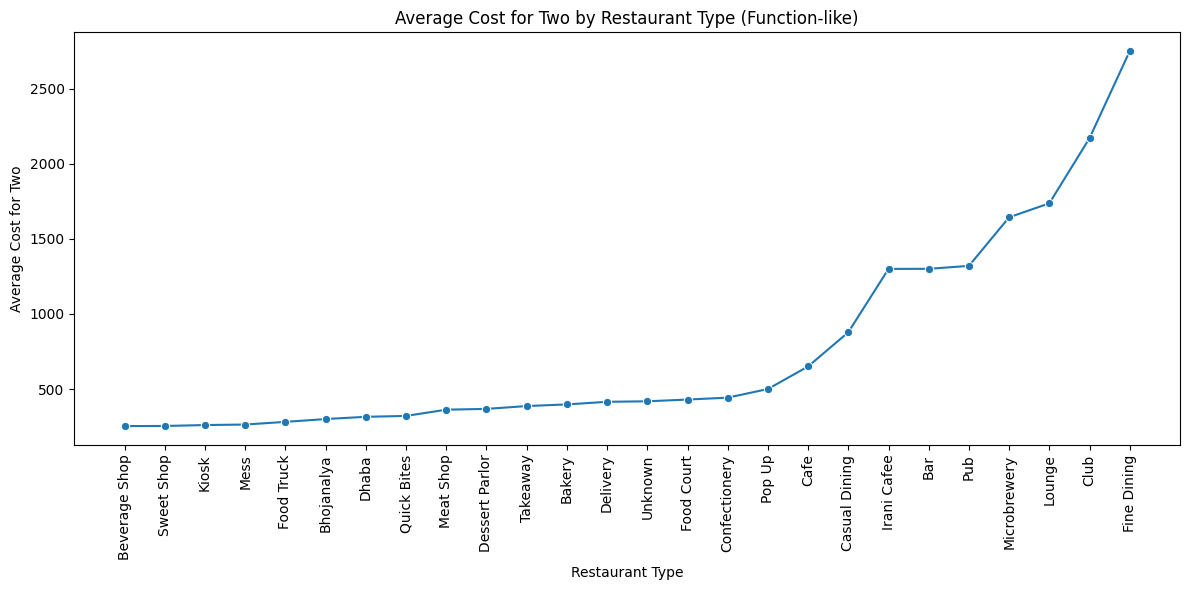

In [145]:
rest_type_group["rank"] = range(len(rest_type_group))
rest_type_group = rest_type_group.sort_values(by="cost_of_two", ascending=True).reset_index(drop=True)

# Create a numeric x-axis (rank)
rest_type_group["rank"] = range(len(rest_type_group))

# Plot line
plt.figure(figsize=(12, 6))
sns.lineplot(x="rank", y="cost_of_two", data=rest_type_group, marker="o")

# Add type labels on x-axis
plt.xticks(ticks=rest_type_group["rank"], labels=rest_type_group["rest_type"], rotation=90)

plt.title("Average Cost for Two by Restaurant Type (Function-like)")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Cost for Two")
plt.tight_layout()
plt.show()

In [147]:
zom_df["cuisines"] = zom_df["cuisines"].str.split(",")
zom_df_exp = zom_df.explode("cuisines")
zom_df_exp["cuisines"] = zom_df_exp["cuisines"].str.strip()
cuisine_group = zom_df_exp.groupby("cuisines")["cost_of_two"].mean().reset_index()

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\3947490151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


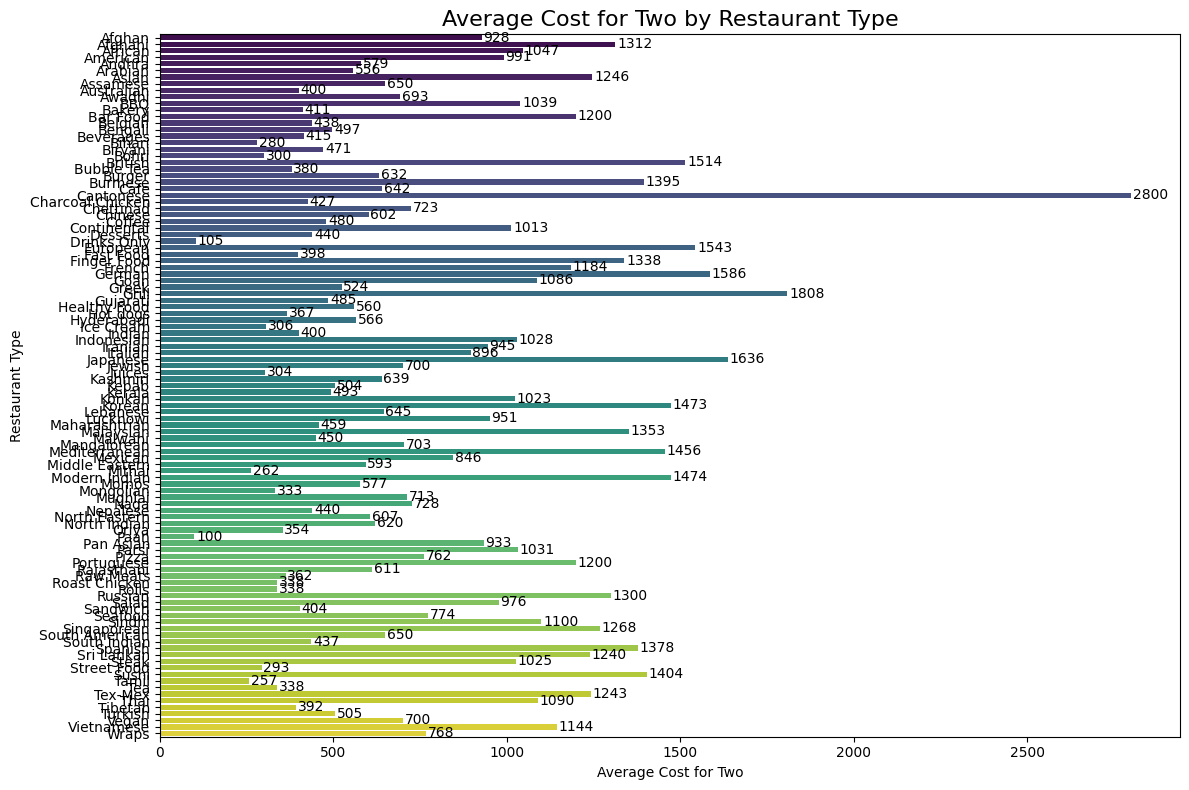

In [148]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x="cost_of_two",
    y="cuisines",
    data=cuisine_group,
    palette="viridis"
)

# Add value labels
for index, value in enumerate(cuisine_group["cost_of_two"]):
    plt.text(value + 5, index, f"{value:.0f}", va="center")

plt.title("Average Cost for Two by Restaurant Type", fontsize=16)
plt.xlabel("Average Cost for Two")
plt.ylabel("Restaurant Type")
plt.tight_layout()
plt.show()

In [150]:
cuisine_group.loc[cuisine_group["cost_of_two"].idxmax()]

cuisines       Cantonese
cost_of_two       2800.0
Name: 24, dtype: object

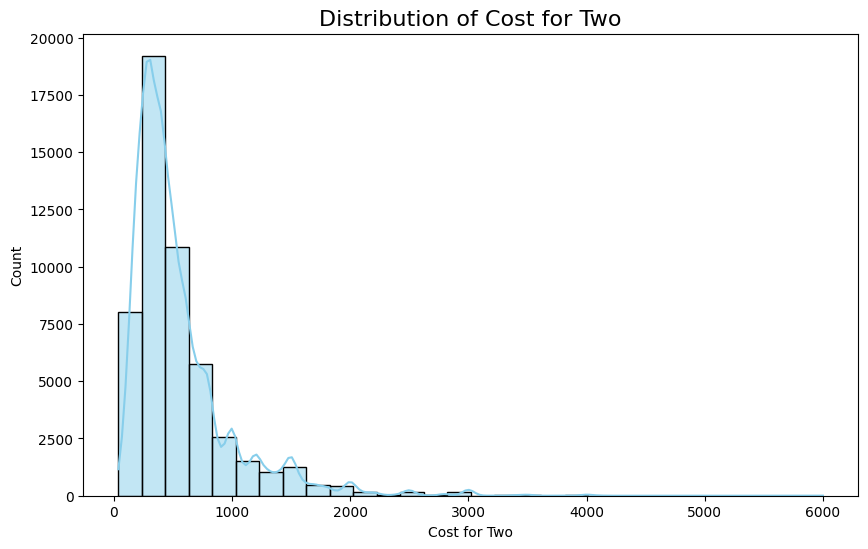

In [151]:
plt.figure(figsize=(10,6))
sns.histplot(zom_df["cost_of_two"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Cost for Two", fontsize=16)
plt.xlabel("Cost for Two")
plt.ylabel("Count")
plt.show()


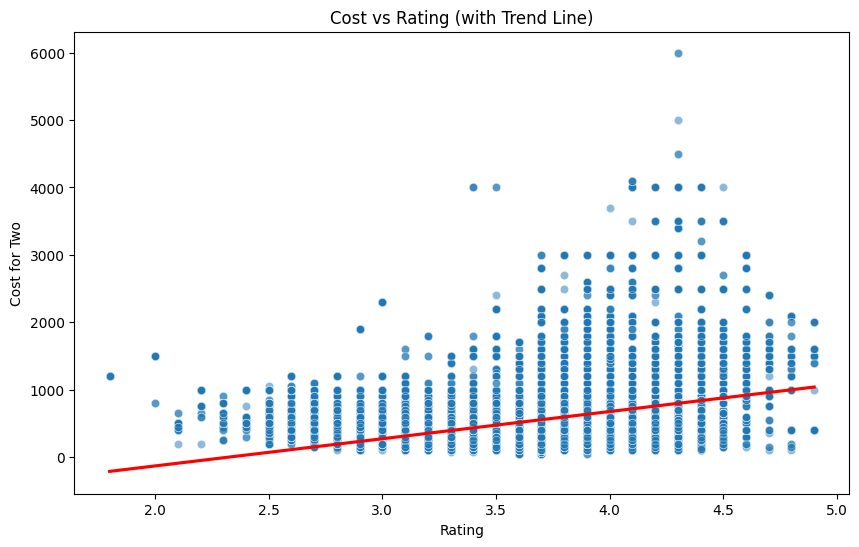

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="rate", y="cost_of_two", data=zom_df, alpha=0.5)
sns.regplot(x="rate", y="cost_of_two", data=zom_df, scatter=False, color="red")
plt.title("Cost vs Rating (with Trend Line)")
plt.xlabel("Rating")
plt.ylabel("Cost for Two")
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\1649809063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rate", y="location", data=zom_df, palette="coolwarm")


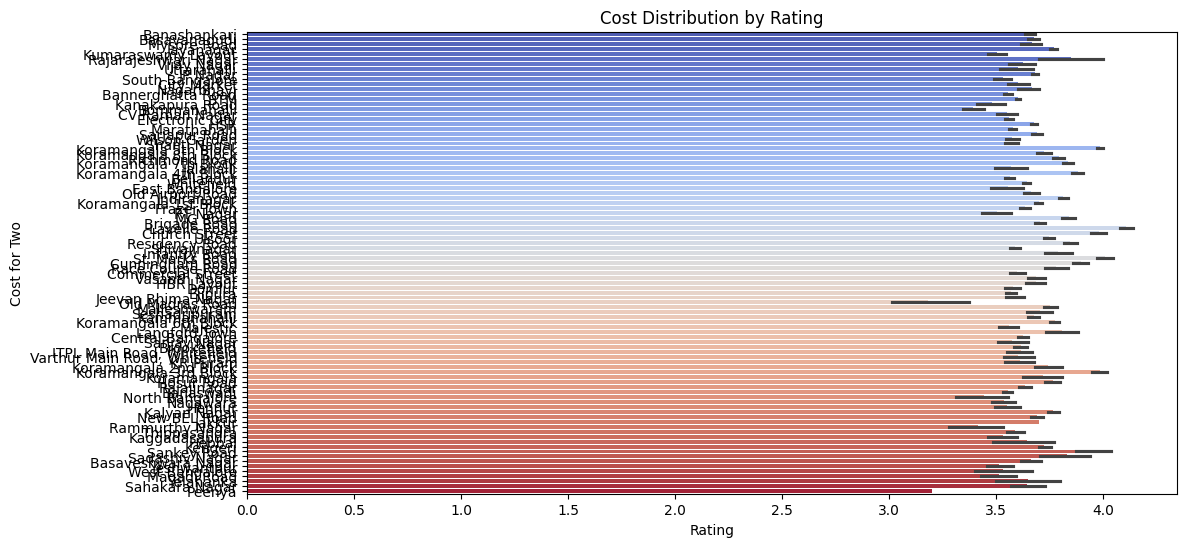

In [156]:
plt.figure(figsize=(12,6))
sns.barplot(x="rate", y="location", data=zom_df, palette="coolwarm")
plt.title("Cost Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Cost for Two")
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_23392\3487292459.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zom_df["rate"], shade=False, color="red", linewidth=2)


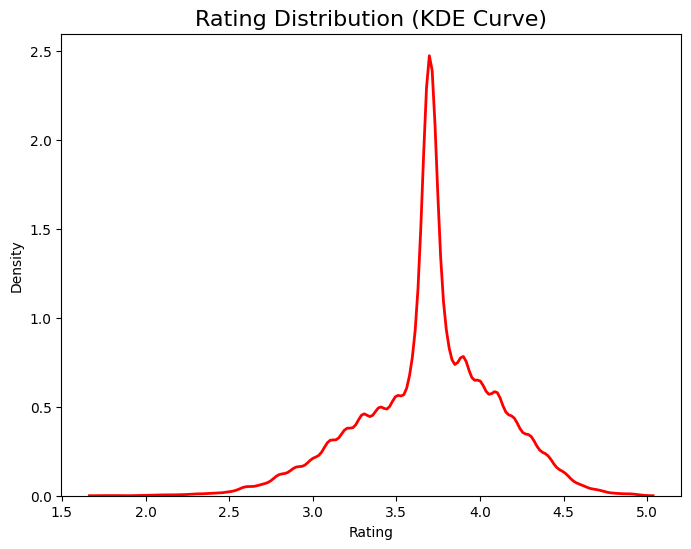

In [164]:
plt.figure(figsize=(8,6))
sns.kdeplot(zom_df["rate"], shade=False, color="red", linewidth=2)
plt.title("Rating Distribution (KDE Curve)", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

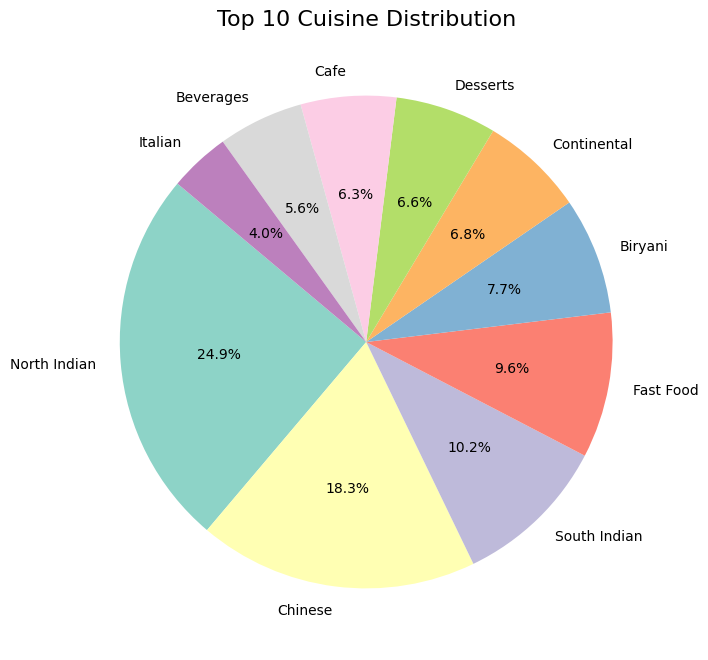

In [166]:
cuisine_counts = zom_df_exp["cuisines"].value_counts().head(10)  # top 10 cuisines

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    cuisine_counts,
    labels=cuisine_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Set3", len(cuisine_counts))
)
plt.title("Top 10 Cuisine Distribution", fontsize=16)
plt.show()

In [173]:
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  object 
 2   book_table       51717 non-null  object 
 3   rate             51717 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51717 non-null  object 
 6   rest_type        51717 non-null  object 
 7   cuisines         51717 non-null  object 
 8   cost_of_two      51717 non-null  float64
 9   reviews_list     51717 non-null  object 
 10  listed_in(type)  51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [175]:
num_values = zom_df[["cost_of_two","votes","rate"]]

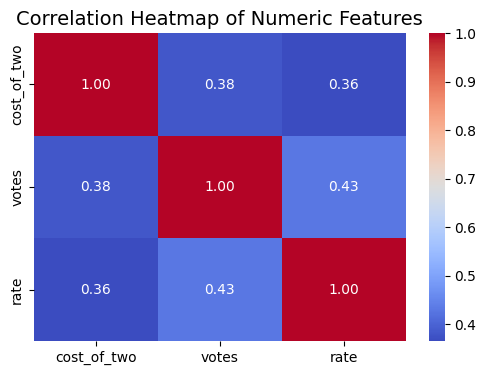

In [ ]:
corr = num_values.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

